# KPI Calculation


#### Data preperation

In [105]:
import pandas as pd
import numpy as np

df_boston = pd.read_csv('./data/boston_2015.csv', dtype={'start_station_id': np.int64, 'end_station_id': 'string', 'end_station_name': 'string', 'start_station_name': 'string', 'bike_id': np.int64, 'user_type': 'string'})
df_boston['end_station_id'].unique()
df_boston.drop(index=df_boston.loc[df_boston["end_station_id"] == "\\N"].index, inplace=True, axis=1)
df_boston = df_boston.astype({'end_station_id': np.int64})
df_boston['start_time'] = pd.to_datetime(df_boston['start_time'], format='%Y-%m-%d %X')
df_boston['end_time'] = pd.to_datetime(df_boston['end_time'], format='%Y-%m-%d %X')
len(df_boston)

1122557

### Utilization
#### Usage Rate (travel time / total possible travel time)

In [106]:
from datetime import datetime, timedelta
amountOfBikes = len(df_boston['bike_id'].unique())

possibleTravelTime = amountOfBikes*365*24*60
possibleTravelTime = timedelta(minutes=possibleTravelTime)

df_boston['trip_length'] = (df_boston['end_time'] - df_boston['start_time'])
realTravelTime = df_boston['trip_length'].sum()

usageRate = realTravelTime.total_seconds() / possibleTravelTime.total_seconds()
print(usageRate*100)

2.8636253630430217


In [107]:

df_usage_rate = df_boston.copy()
df_usage_rate.dtypes
# df_usage_rate['Weekday'] = df_usage_rate['start_time'].dt.day_name()
# df_usage_rate.loc[df_usage_rate['start_time'] < datetime(2015,1,2)].head()
# df_usage_rate['start_hour'] = df_usage_rate['start_time'].dt.hour
# df_usage_rate['end_hour'] = df_usage_rate['end_time'].dt.hour
# df_usage_rate_overlapping = df_usage_rate.loc[df_usage_rate['start_hour'] != df_usage_rate['end_hour']]

# Insert new 'end_time' (e.g. 08:59:59) and new 'start_time' (e.g. 09:00:00) in column 'times_tmp'
df_usage_rate['times_tmp'] = df_usage_rate.apply((lambda x: [x.start_time.ceil('H')- timedelta(seconds=1), x.start_time.ceil('H')] if x.start_time.hour != x.end_time.hour else None), axis=1)
# df_usage_rate.apply(lambda x: print(x.start_time), axis=1)
# df_usage_rate.set_index('start_time')
# df_usage_rate[df_usage_rate['start_time']=='2015-01-01 01:28:27']



#df_rentals_month_weekday= df_usage_rate.groupby(['Month', 'Weekday']).size().reset_index(name='num_rides')

#df_rentals_month_weekday.Weekday = pd.Categorical(df_rentals_month_weekday.Weekday,categories=days)
#df_rentals_month_weekday = df_rentals_month_weekday.sort_values('Weekday')

#df_rentals_month_weekday.Month = pd.Categorical(df_rentals_month_weekday.Month,categories=months)
#df_rentals_month_weekday = df_rentals_month_weekday.sort_values('Month')

#sns.lineplot(data=df_rentals_month_weekday, x='Weekday', y='num_rides', hue='Month')
#df_usage_rate['start_time']

In [108]:
# Create new row for every new end- and start-time
df_usage_rate=df_usage_rate.explode('times_tmp')
# If 'times_tmp' ist an end_time (minute = 59), replace 'end_time'
df_usage_rate['end_time'] = df_usage_rate.apply(lambda x: x.times_tmp if x.times_tmp.minute == 59 else x.end_time, axis=1)
# If 'times_tmp' ist a start_time (minute = 0), replace 'start_time'
df_usage_rate['start_time'] = df_usage_rate.apply(lambda x: x.times_tmp if x.times_tmp.minute == 0 else x.start_time, axis=1)

In [109]:
df_usage_rate['date'] = df_usage_rate['start_time'].dt.date
df_usage_rate['hour'] = df_usage_rate['start_time'].dt.hour
df_usage_rate['month'] = df_usage_rate['start_time'].dt.month

#df_usage_rate_first_day = df_usage_rate.loc[df_usage_rate["date"] < "2015-01-02"]
df_usage_rate
#df_usage_rate.loc[df_usage_rate['date'] == "2015-01-01"]
#df_usage_rate.groupby('bike_id')['date'].nunique().reset_index()
#df_usage_rate_first_day


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_length,times_tmp,date,hour,month
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber,0 days 00:09:03,NaT,2015-01-01,0,1
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber,0 days 00:07:18,NaT,2015-01-01,0,1
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber,0 days 00:04:15,NaT,2015-01-01,0,1
3,2015-01-01 00:53:46,2015-01-01 00:59:59,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber,0 days 00:07:12,2015-01-01 00:59:59,2015-01-01,0,1
3,2015-01-01 01:00:00,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber,0 days 00:07:12,2015-01-01 01:00:00,2015-01-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122554,2015-12-31 23:37:29,2015-12-31 23:47:36,135,43,ID Building East,Rowes Wharf - Atlantic Ave,649,Subscriber,0 days 00:10:07,NaT,2015-12-31,23,12
1122555,2015-12-31 23:38:16,2015-12-31 23:47:26,135,43,ID Building East,Rowes Wharf - Atlantic Ave,1552,Subscriber,0 days 00:09:10,NaT,2015-12-31,23,12
1122556,2015-12-31 23:46:04,2015-12-31 23:48:04,36,36,Boston Public Library - 700 Boylston St.,Boston Public Library - 700 Boylston St.,1083,Customer,0 days 00:02:00,NaT,2015-12-31,23,12
1122557,2015-12-31 23:58:18,2015-12-31 23:59:59,105,6,Lower Cambridgeport at Magazine St/Riverside Rd,Cambridge St. at Joy St.,1305,Subscriber,0 days 00:14:36,2015-12-31 23:59:59,2015-12-31,23,12


<AxesSubplot: xlabel='date', ylabel='usage_rate'>

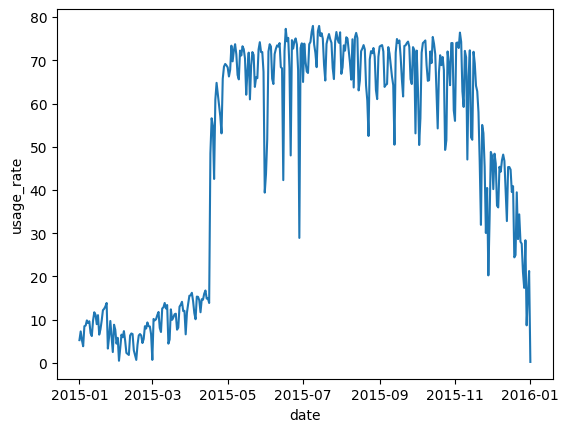

In [110]:
import seaborn as sns
# Group all rides of the year by Month and Weekday
df_number_of_used_bikes = df_usage_rate.groupby('date').nunique()
df_number_of_used_bikes['usage_rate'] = df_number_of_used_bikes['bike_id']/amountOfBikes*100
#df_number_of_used_bikes
sns.lineplot(data=df_number_of_used_bikes, x='date', y='usage_rate')


# Transform dtype from object to category
#df_rentals_month_weekday.Weekday = pd.Categorical(df_rentals_month_weekday.Weekday,categories=days)
#df_rentals_month_weekday = df_rentals_month_weekday.sort_values('Weekday')

# Transform dtype from object to category
#df_rentals_month_weekday.Month = pd.Categorical(df_rentals_month_weekday.Month,categories=months)
#df_rentals_month_weekday = df_rentals_month_weekday.sort_values('Month')

#sns.lineplot(data=df_rentals_month_weekday, x='Weekday', y='num_rides', hue='Month')

<AxesSubplot: xlabel='hour', ylabel='usage_rate'>

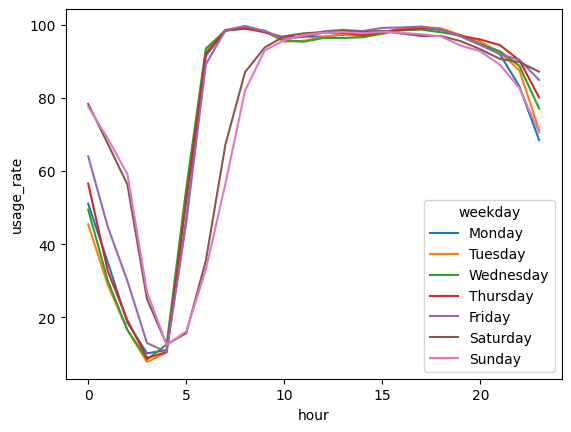

In [133]:
# Utilization rate over the week in hourly values

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_number_of_used_bikes_per_week = df_usage_rate.copy()
df_number_of_used_bikes_per_week['weekday'] = df_number_of_used_bikes_per_week['start_time'].dt.day_name()
df_number_of_used_bikes_per_week['weekday'] = pd.Categorical(df_number_of_used_bikes_per_week['weekday'],categories=days)
df_rentals_month_weekday = df_number_of_used_bikes_per_week.sort_values('weekday')
#df_number_of_used_bikes_per_week['weekday_hour'] = df_number_of_used_bikes_per_week['weekday'].astype(str) + " " + df_number_of_used_bikes_per_week["hour"].astype(str)
df_number_of_used_bikes_per_week = df_number_of_used_bikes_per_week.groupby(['weekday','hour']).nunique()
df_number_of_used_bikes_per_week['usage_rate'] = df_number_of_used_bikes_per_week['bike_id']/amountOfBikes*100

sns.lineplot(data=df_number_of_used_bikes_per_week, x='hour', y='usage_rate', hue='weekday')

In [111]:
# Utilization rate over week
df_number_of_used_bikes_per_week = df_usage_rate.copy()
df_number_of_used_bikes_per_week['weekday'] = df_number_of_used_bikes_per_week['start_time'].dt.day_name()
df_number_of_used_bikes_per_week['weekday_hour'] = df_number_of_used_bikes_per_week['weekday'] + " " + df_number_of_used_bikes_per_week["hour"].astype(str)
df_number_of_used_bikes_per_week = df_number_of_used_bikes_per_week.groupby(['weekday', 'hour']).nunique()


#df_number_of_used_bikes_per_week['usage_rate'] = df_number_of_used_bikes_per_week['bike_id']/amountOfBikes*100
#sns.lineplot(data=df_number_of_used_bikes_per_week, x=['weekday','hour'], y='usage_rate')

df_number_of_used_bikes_per_week


start_time  end_time  start_station_id  end_station_id  \
weekday   hour                                                           
Friday    0           1336      1495               129             139   
          1            765       852               126             135   
          2            433       500               101             119   
          3            175       217                75              86   
          4            162       147                71              79   
...                    ...       ...               ...             ...   
Wednesday 19         10344     11340               151             151   
          20          7056      7676               150             153   
          21          4965      5303               145             151   
          22          3782      4123               144             149   
          23          2196      2466               139             149   

                start_station_name  end_station_name  bike_id  user_type  \
weekday   hour                                                             
Friday    0                    129               139      953          2   
          1                    126               135      666          2   
          2                    101               119      446          2   
          3                     75                86      194          2   
          4                     71                79      157          2   
...                            ...               ...      ...        ...   
Wednesday 19                   151               151     1444          2   
          20                   150               153     1408          2   
          21                   145               151     1380          2   
          22                   144               149     1320          2   
          23                   139               149     1147          2   

                trip_length  times_tmp  date  month  weekday_hour  
weekday   hour                                                     
Friday    0            1115         84    53     12             1  
          1             761         76    49     12             1  
          2             472         66    46     12             1  
          3             220         49    44     12             1  
          4             159         42    39     11             1  
...                     ...        ...   ...    ...           ...  
Wednesday 19           2657        102    52     12             1  
          20           2227         99    52     12             1  
          21           1935         95    52     12             1  
          22           1767         93    52     12             1  
          23           1434         87    51     12             1  

[168 rows x 13 columns]

### Coverage

### Revenue

### Clustering